In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# For optimization
import pulp

# For geospatial visualization
import folium
from folium.plugins import MarkerCluster

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display settings
%matplotlib inline
sns.set(style="whitegrid")



In [31]:
demand_data = pd.read_excel('/Users/suyashranjan/Desktop/Project-7th Sem/New-Demand-Estimation.xlsx',sheet_name="Final")
# Display the first few rows
demand_data.head(10)


,Sr. No.,State or UT,District,Sub-District,Bread and Bun Demand in KG,Cookies and Biscuits Demand in KG,Cake and Rusk Demand in KG,Full Location,Latitude,Longitude
0,1,Jammu and Kashmir,Kupwara,Kupwara,282,141,47,"Kupwara, Kupwara, Jammu and Kashmir",34.526608,74.256717
1,2,Jammu and Kashmir,Kupwara,Handwara,140,70,23,"Handwara, Kupwara, Jammu and Kashmir",34.399314,74.282740
2,3,Jammu and Kashmir,Kupwara,Karnah,31,16,5,"Karnah, Kupwara, Jammu and Kashmir",34.347819,73.827100
3,4,Jammu and Kashmir,Badgam,Khag,35,18,6,"Khag, Badgam, Jammu and Kashmir",33.998597,74.530992
4,5,Jammu and Kashmir,Badgam,Beerwah,85,43,14,"Beerwah, Badgam, Jammu and Kashmir",34.012551,74.595087
5,6,Jammu and Kashmir,Badgam,Khansahib,64,32,11,"Khansahib, Badgam, Jammu and Kashmir",33.932286,74.658266
6,7,Jammu and Kashmir,Badgam,Budgam,70,35,12,"Budgam, Badgam, Jammu and Kashmir",33.993366,74.775163
7,8,Jammu and Kashmir,Badgam,Chadoora,111,55,18,"Chadoora, Badgam, Jammu and Kashmir",33.943727,74.798672
8,9,Jammu and Kashmir,Badgam,Charar- E- Shrief,28,14,5,"Charar- E- Shrief, Badgam, Jammu and Kashmir",33.813456,74.662524
9,10,Jammu and Kashmir,Leh(Ladakh),Leh,49,24,8,"Leh, Leh(Ladakh), Jammu and Kashmir",34.163656,77.584015


In [32]:
demand_data.drop(columns=["Sr. No.", "Full Location"], axis=1, inplace=True)


In [33]:
demand_data.head()


,State or UT,District,Sub-District,Bread and Bun Demand in KG,Cookies and Biscuits Demand in KG,Cake and Rusk Demand in KG,Latitude,Longitude
0,Jammu and Kashmir,Kupwara,Kupwara,282,141,47,34.526608,74.256717
1,Jammu and Kashmir,Kupwara,Handwara,140,70,23,34.399314,74.282740
2,Jammu and Kashmir,Kupwara,Karnah,31,16,5,34.347819,73.827100
3,Jammu and Kashmir,Badgam,Khag,35,18,6,33.998597,74.530992
4,Jammu and Kashmir,Badgam,Beerwah,85,43,14,34.012551,74.595087


In [34]:
demand_data["Monthly_Demand"] = (demand_data["Bread and Bun Demand in KG"]+ demand_data["Cookies and Biscuits Demand in KG"] + demand_data["Cake and Rusk Demand in KG"])*30

In [35]:
demand_data.head()


,State or UT,District,Sub-District,Bread and Bun Demand in KG,Cookies and Biscuits Demand in KG,Cake and Rusk Demand in KG,Latitude,Longitude,Monthly_Demand
0,Jammu and Kashmir,Kupwara,Kupwara,282,141,47,34.526608,74.256717,14100
1,Jammu and Kashmir,Kupwara,Handwara,140,70,23,34.399314,74.282740,6990
2,Jammu and Kashmir,Kupwara,Karnah,31,16,5,34.347819,73.827100,1560
3,Jammu and Kashmir,Badgam,Khag,35,18,6,33.998597,74.530992,1770
4,Jammu and Kashmir,Badgam,Beerwah,85,43,14,34.012551,74.595087,4260


In [36]:
demand_data.rename(columns={
    'State or UT':"State",
     'Sub-District': 'Sub_District' },
     inplace=True)

In [37]:
# Aggregate demand by Sub-District
sub_district_demand = demand_data.groupby(['District', 'Sub_District', 'Latitude', 'Longitude']).agg({
    'Monthly_Demand': 'sum'
}).reset_index()

# Display aggregated data
sub_district_demand.head()


,District,Sub_District,Latitude,Longitude,Monthly_Demand
0,Agra,Agra,27.175255,78.009816,30060
1,Agra,Bah,26.870649,78.497301,5910
2,Agra,Etmadpur,27.233637,78.198136,5040
3,Agra,Fatehabad,27.027668,78.207434,14070
4,Agra,Kheragarh,26.905370,77.616258,6390


In [38]:
sub_district_demand.sort_values(by='Monthly_Demand',ascending=False)

,District,Sub_District,Latitude,Longitude,Monthly_Demand
736,Ludhiana,Ludhiana (East),30.861901,76.027356,63390
646,Kanpur Nagar,Kanpur,26.513188,80.236484,47700
731,Lucknow,Lucknow,26.838100,80.934600,46590
60,Amritsar,Amritsar- II,31.670915,75.041563,46410
863,North West Delhi,Saraswati Vihar,28.700224,77.124936,45210
...,...,...,...,...,...
694,Kinnaur,Morang,31.598048,78.447875,300
696,Kinnaur,Poo,31.761590,78.583932,240
629,Kangra,Multhan,32.253054,76.899418,210
1072,Shimla,Dodra Kwar,31.257064,78.151559,210


In [39]:
# Standardize the demand for clustering
scaler = StandardScaler()
sub_district_demand['Scaled_Demand'] = scaler.fit_transform(sub_district_demand[['Monthly_Demand']])

# Display the scaled demand
sub_district_demand.head()


,District,Sub_District,Latitude,Longitude,Monthly_Demand,Scaled_Demand
0,Agra,Agra,27.175255,78.009816,30060,4.132815
1,Agra,Bah,26.870649,78.497301,5910,0.079154
2,Agra,Etmadpur,27.233637,78.198136,5040,-0.066879
3,Agra,Fatehabad,27.027668,78.207434,14070,1.448838
4,Agra,Kheragarh,26.905370,77.616258,6390,0.159723


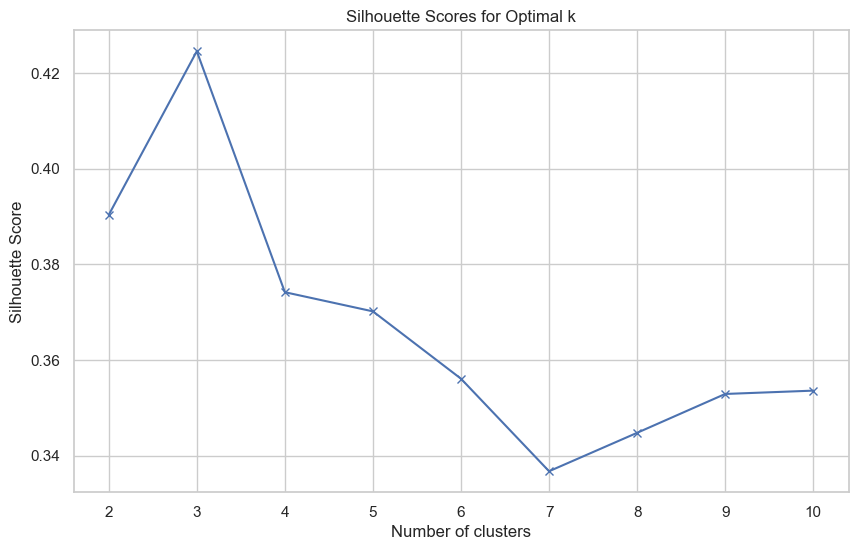

In [40]:
from sklearn.metrics import silhouette_score

# Function to calculate silhouette scores for different number of clusters
def optimal_clusters(data, max_k=10):
    silhouette_scores = []
    K = range(2, max_k+1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data[['Scaled_Demand', 'Latitude', 'Longitude']])
        score = silhouette_score(data[['Scaled_Demand', 'Latitude', 'Longitude']], kmeans.labels_)
        silhouette_scores.append(score)
    # Plot silhouette scores
    plt.figure(figsize=(10,6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Optimal k')
    plt.show()

# Determine optimal clusters
optimal_clusters(sub_district_demand, max_k=10)


In [41]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
sub_district_demand['Cluster'] = kmeans.fit_predict(sub_district_demand[['Scaled_Demand', 'Latitude', 'Longitude']])

# Display cluster assignments
sub_district_demand.head()


,District,Sub_District,Latitude,Longitude,Monthly_Demand,Scaled_Demand,Cluster
0,Agra,Agra,27.175255,78.009816,30060,4.132815,1
1,Agra,Bah,26.870649,78.497301,5910,0.079154,1
2,Agra,Etmadpur,27.233637,78.198136,5040,-0.066879,1
3,Agra,Fatehabad,27.027668,78.207434,14070,1.448838,1
4,Agra,Kheragarh,26.905370,77.616258,6390,0.159723,0


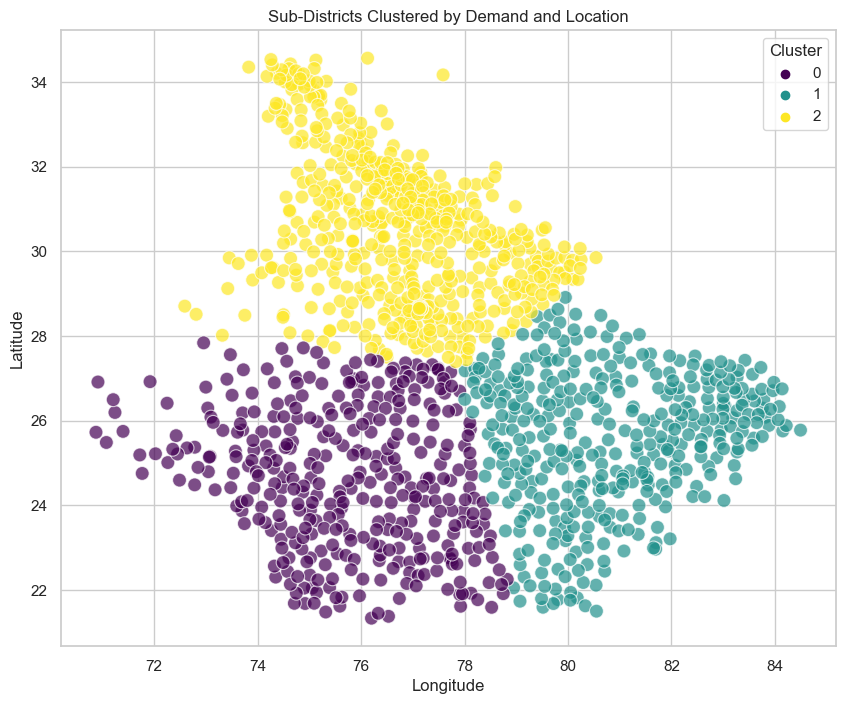

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(
    x='Longitude', y='Latitude',
    hue='Cluster',
    data=sub_district_demand,
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('Sub-Districts Clustered by Demand and Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


<div style="background-color: #a2cafc; color: #000000; padding: 10px;">
    <h3>Geometrical Centroids</h3>
</div>

In [43]:
# Group by Cluster and calculate the mean Latitude and Longitude (centroid)
cluster_centroids = sub_district_demand.groupby('Cluster')[['Latitude', 'Longitude']].mean()

# Display the centroids
print(cluster_centroids)

          Latitude  Longitude
Cluster                      
0        24.609743  75.745501
1        25.521204  80.860440
2        30.480247  76.758438


In [44]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# Initialize Nominatim with a custom user agent
geolocator = Nominatim(user_agent="my_custom_geocoder_app")

# List of coordinates (each element is a tuple with latitude and longitude)
coordinates = [
        (24.609743,  75.745501),
        (25.521204,  80.860440),
        (30.480247,  76.758438)
]

# Function to perform reverse geocoding with error handling and rate limiting
def get_location_name(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address if location else "Unknown location"
    except GeocoderTimedOut:
        print("Timeout error. Retrying...")
        return get_location_name(lat, lon)  # Retry on timeout
    except GeocoderServiceError as e:
        print(f"Service error: {e}")
        return "Service error"

# Get place names for all coordinates with delay to avoid rate limiting
for i, (lat, lon) in enumerate(coordinates):
    place_name = get_location_name(lat, lon)
    print(f"Cluster {i}: {place_name}")
    time.sleep(1)  # Delay between requests to comply with usage policy


Cluster 0: Badi, Bhanpura Tahsil, Mandsaur, Madhya Pradesh, India
Cluster 1: SH92, Kamasin, Baberu, Banda, Uttar Pradesh, 210125, India
Cluster 2: Chajon, Rajpura Tahsil, Patiala, Punjab, India


<div style="background-color: #a2cafc; color: #000000; padding: 10px;">
    <h3>Weighted Centroids</h3>
</div>

In [45]:
# Step 1: Multiply Latitude and Longitude by Scaled Demand to weight them
sub_district_demand['Weighted_Latitude'] = sub_district_demand['Latitude'] * sub_district_demand['Monthly_Demand']
sub_district_demand['Weighted_Longitude'] = sub_district_demand['Longitude'] * sub_district_demand['Monthly_Demand']

# Step 2: Group by Cluster and sum the weighted latitudes and longitudes, also sum the demand
weighted_sums = sub_district_demand.groupby('Cluster').agg({
    'Weighted_Latitude': 'sum',
    'Weighted_Longitude': 'sum',
    'Monthly_Demand': 'sum'
})

# Step 3: Calculate the demand-weighted centroids by dividing the weighted sums by total demand
weighted_centroids = pd.DataFrame({
    'Latitude': weighted_sums['Weighted_Latitude'] / weighted_sums['Monthly_Demand'],
    'Longitude': weighted_sums['Weighted_Longitude'] / weighted_sums['Monthly_Demand']
})

# Display the demand-weighted centroids
print(weighted_centroids)


          Latitude  Longitude
Cluster                      
0        24.878082  75.547293
1        26.128980  81.181775
2        30.050475  76.518521


In [46]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

# Initialize Nominatim with a custom user agent
geolocator = Nominatim(user_agent="my_custom_geocoder_app")

# List of coordinates (each element is a tuple with latitude and longitude)
coordinates = [
       (24.878082,  75.547293),
       (26.128980,  81.181775),
       (30.050475,  76.518521),
]

# Function to perform reverse geocoding with error handling and rate limiting
def get_location_name(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address if location else "Unknown location"
    except GeocoderTimedOut:
        print("Timeout error. Retrying...")
        return get_location_name(lat, lon)  # Retry on timeout
    except GeocoderServiceError as e:
        print(f"Service error: {e}")
        return "Service error"

# Get place names for all coordinates with delay to avoid rate limiting
for i, (lat, lon) in enumerate(coordinates):
    place_name = get_location_name(lat, lon)
    print(f"Cluster {i}: {place_name}")
    time.sleep(1)  # Delay between requests to comply with usage policy


Cluster 0: Hempura, Chenpua, Rawatbhata Tehsil, Chittorgarh, Rajasthan, India
Service error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=26.12898&lon=81.181775&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x128099050>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Cluster 1: Service error
Service error: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=30.050475&lon=76.518521&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x12808cd10>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))
Cluster 2: Service error


<div style="background-color: #a2cafc; color: #000000; padding: 10px;">
    <h3>Sub Clustering</h3>
</div>

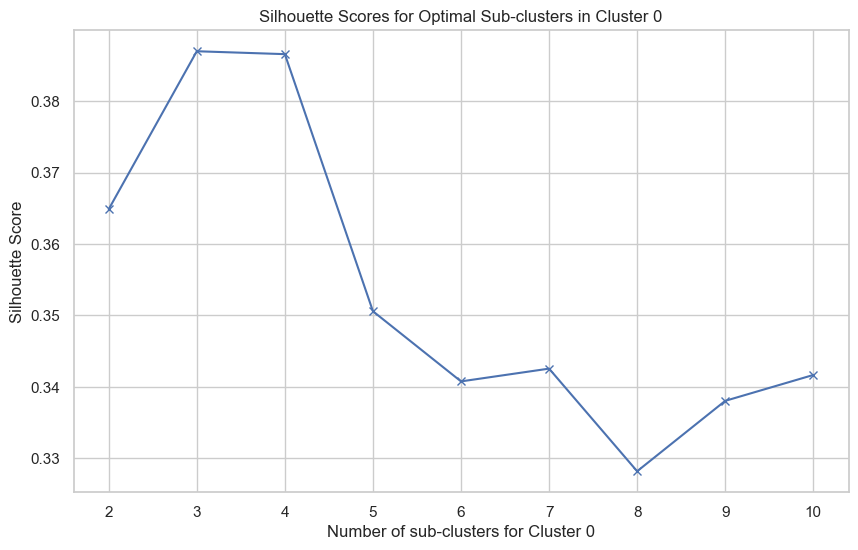

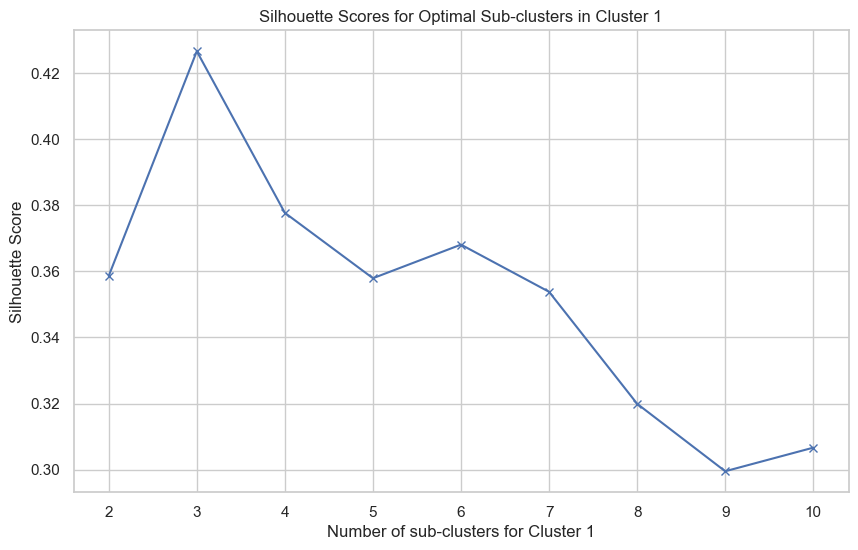

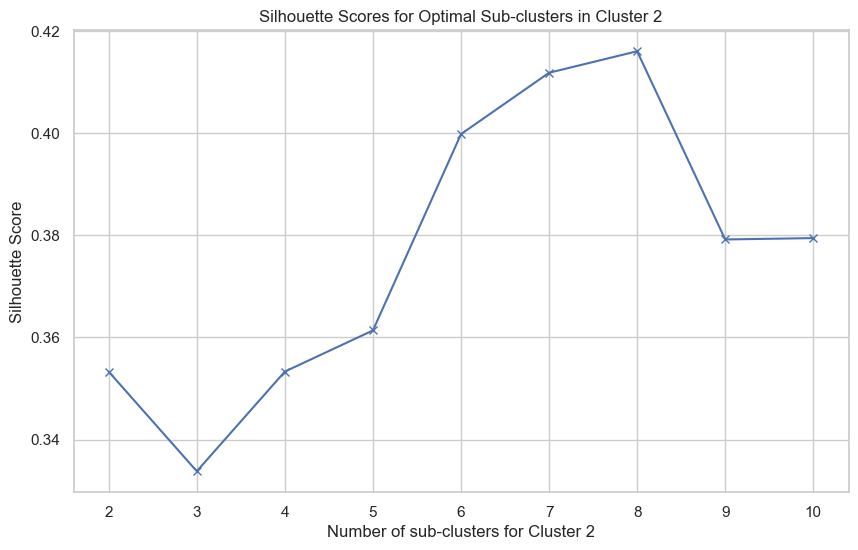

,District,Sub_District,Latitude,Longitude,Monthly_Demand,Scaled_Demand,Cluster,Weighted_Latitude,Weighted_Longitude,Sub_Cluster
0,Agra,Agra,27.175255,78.009816,30060,4.132815,1,816888.177324,2.344975e+06,0.0
1,Agra,Bah,26.870649,78.497301,5910,0.079154,1,158805.537658,4.639190e+05,0.0
2,Agra,Etmadpur,27.233637,78.198136,5040,-0.066879,1,137257.531488,3.941186e+05,0.0
3,Agra,Fatehabad,27.027668,78.207434,14070,1.448838,1,380279.292278,1.100379e+06,0.0
4,Agra,Kheragarh,26.905370,77.616258,6390,0.159723,0,171925.317176,4.959679e+05,2.0


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Function to calculate silhouette scores for sub-clustering within a main cluster
def optimal_subclusters(data, cluster_label, max_k=10):
    silhouette_scores = []
    K = range(2, max_k+1)
    
    # Filter the data for the current main cluster
    cluster_data = data[data['Cluster'] == cluster_label]
    
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(cluster_data[['Scaled_Demand', 'Latitude', 'Longitude']])
        score = silhouette_score(cluster_data[['Scaled_Demand', 'Latitude', 'Longitude']], kmeans.labels_)
        silhouette_scores.append(score)
    
    # Plot silhouette scores
    plt.figure(figsize=(10,6))
    plt.plot(K, silhouette_scores, 'bx-')
    plt.xlabel(f'Number of sub-clusters for Cluster {cluster_label}')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Scores for Optimal Sub-clusters in Cluster {cluster_label}')
    plt.show()
    
    # Return the optimal number of sub-clusters (k with the highest silhouette score)
    optimal_k = K[silhouette_scores.index(max(silhouette_scores))]
    return optimal_k

# Create sub-clusters within each main cluster
for cluster_label in range(3):  # assuming 3 main clusters
    optimal_k = optimal_subclusters(sub_district_demand, cluster_label, max_k=10)
    
    # Perform KMeans for the optimal number of sub-clusters
    sub_cluster_data = sub_district_demand[sub_district_demand['Cluster'] == cluster_label]
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    sub_cluster_labels = kmeans.fit_predict(sub_cluster_data[['Scaled_Demand', 'Latitude', 'Longitude']])
    
    # Assign sub-cluster labels to the original dataset
    sub_district_demand.loc[sub_district_demand['Cluster'] == cluster_label, 'Sub_Cluster'] = sub_cluster_labels

# Display cluster and sub-cluster assignments
sub_district_demand.head()

In [48]:
# Calculate weighted center of gravity for each sub-cluster
def calculate_weighted_cog(data):
    weighted_cogs = []
    
    # Group by 'Cluster' and 'Sub_Cluster'
    sub_clusters = data.groupby(['Cluster', 'Sub_Cluster'])
    
    for (cluster_label, sub_cluster_label), group in sub_clusters:
        total_demand = group['Scaled_Demand'].sum()
        
        # Calculate weighted averages of latitude and longitude
        weighted_lat = (group['Latitude'] * group['Scaled_Demand']).sum() / total_demand
        weighted_lon = (group['Longitude'] * group['Scaled_Demand']).sum() / total_demand
        
        # Append result as a dictionary
        weighted_cogs.append({
            'Cluster': cluster_label,
            'Sub_Cluster': sub_cluster_label,
            'Weighted_Center_Latitude': weighted_lat,
            'Weighted_Center_Longitude': weighted_lon
        })
    
    # Convert results to DataFrame for better readability
    return pd.DataFrame(weighted_cogs)

# Calculate and display the weighted center of gravity for each sub-cluster
weighted_centers = calculate_weighted_cog(sub_district_demand)
print(weighted_centers)

    Cluster  Sub_Cluster  Weighted_Center_Latitude  Weighted_Center_Longitude
0         0          0.0                 23.011932                  76.687687
1         0          1.0                 25.106768                  73.989254
2         0          2.0                 25.711795                  77.098390
3         1          0.0                 27.579550                  79.835985
4         1          1.0                 26.230257                  82.570122
5         1          2.0                 23.661480                  80.184105
6         2          0.0                 29.005805                  77.162066
7         2          1.0                 33.385332                  75.344516
8         2          2.0                 28.652085                  77.688606
9         2          3.0                 31.452077                  77.091093
10        2          4.0                 29.943827                  79.313927
11        2          5.0                 30.654873              

ValueError: Could not interpret value `Weighted_Center_Longitude` for parameter `x`

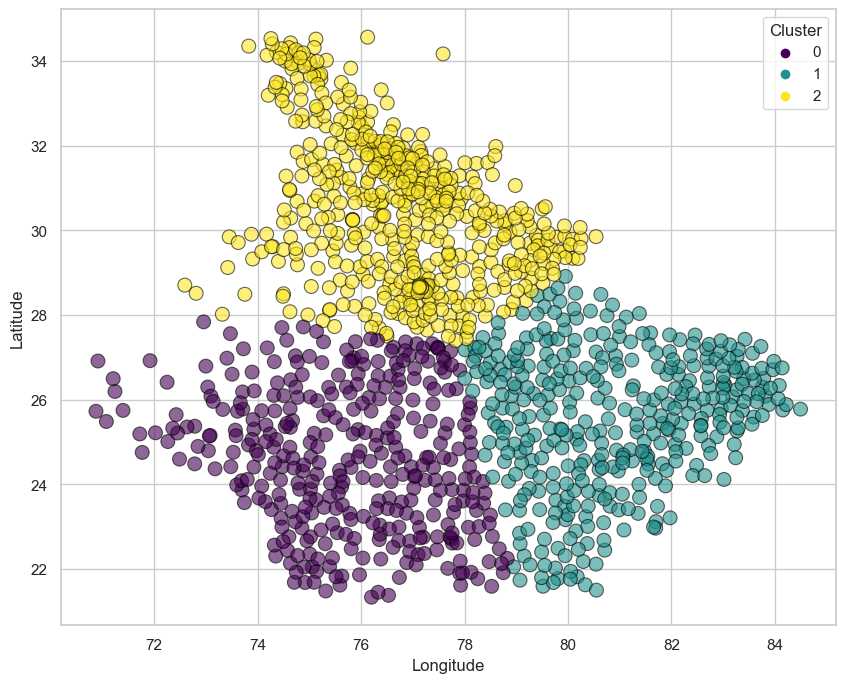

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for main clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Longitude', y='Latitude',
    hue='Cluster',  # Use main clusters for this layer
    data=sub_district_demand,  # Data for the main clusters
    palette='viridis',  # Palette for clusters
    s=100,
    alpha=0.6,  # Make it slightly transparent to allow overlap visibility
    edgecolor='black'
)

# Overlay plot for sub-clusters
sns.scatterplot(
    x='Weighted_Center_Longitude', y='Weighted_Center_Latitude',
    hue='Sub_Cluster',  # Use sub-clusters for this layer
    data=sub_district_demand,  # Data for sub-clusters
    palette='coolwarm',  # A different palette for sub-clusters
    s=150,  # Slightly larger markers for sub-clusters
    marker='X',  # Different marker for sub-clusters (e.g., 'X' shape)
    edgecolor='black',  # Black edge to distinguish
    alpha=1  # Full opacity for sub-clusters to ensure clarity
)

# Titles and labels
plt.title('Sub-Districts and Sub-Clusters by Demand and Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Create separate legends for Cluster and Sub-cluster
plt.legend(title='Clusters and Sub-Clusters')

# Show plot
plt.show()

In [50]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import pandas as pd

# Initialize Nominatim with a custom user agent
geolocator = Nominatim(user_agent="my_custom_geocoder_app")

# Function to perform reverse geocoding with error handling and rate limiting
def get_location_name(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        return location.address if location else "Unknown location"
    except GeocoderTimedOut:
        print("Timeout error. Retrying...")
        return get_location_name(lat, lon)  # Retry on timeout
    except GeocoderServiceError as e:
        print(f"Service error: {e}")
        return "Service error"

# Calculate weighted center of gravity for each sub-cluster
def calculate_weighted_cog_with_location(data):
    weighted_cogs = []
    
    # Group by 'Cluster' and 'Sub_Cluster'
    sub_clusters = data.groupby(['Cluster', 'Sub_Cluster'])
    
    for (cluster_label, sub_cluster_label), group in sub_clusters:
        total_demand = group['Scaled_Demand'].sum()
        
        # Calculate weighted averages of latitude and longitude
        weighted_lat = (group['Latitude'] * group['Scaled_Demand']).sum() / total_demand
        weighted_lon = (group['Longitude'] * group['Scaled_Demand']).sum() / total_demand
        
        # Get the place name using reverse geocoding
        place_name = get_location_name(weighted_lat, weighted_lon)
        
        # Append result as a dictionary
        weighted_cogs.append({
            'Cluster': cluster_label,
            'Sub_Cluster': sub_cluster_label,
            'Weighted_Center_Latitude': weighted_lat,
            'Weighted_Center_Longitude': weighted_lon,
            'Location': place_name
        })
        
        # Add a delay to avoid rate-limiting
        time.sleep(1)
    
    # Convert results to DataFrame for better readability
    return pd.DataFrame(weighted_cogs)

# Example usage: Calculate and display the weighted center of gravity and location for each sub-cluster
weighted_centers_with_location = calculate_weighted_cog_with_location(sub_district_demand)
print(weighted_centers_with_location)

    Cluster  Sub_Cluster  Weighted_Center_Latitude  Weighted_Center_Longitude  \
0         0          0.0                 23.011932                  76.687687   
1         0          1.0                 25.106768                  73.989254   
2         0          2.0                 25.711795                  77.098390   
3         1          0.0                 27.579550                  79.835985   
4         1          1.0                 26.230257                  82.570122   
5         1          2.0                 23.661480                  80.184105   
6         2          0.0                 29.005805                  77.162066   
7         2          1.0                 33.385332                  75.344516   
8         2          2.0                 28.652085                  77.688606   
9         2          3.0                 31.452077                  77.091093   
10        2          4.0                 29.943827                  79.313927   
11        2          5.0    

In [51]:
# Extract only the Location column and print it in a clean format
locations_only = weighted_centers_with_location['Location']

# Print each location in a more readable format
for i, location in enumerate(locations_only, start=1):
    print(f"Sub-cluster {i}: {location}")

Sub-cluster 1: Rajakpura, Chancharsi, Ashta Tahsil, Sehore, Madhya Pradesh, India
Sub-cluster 2: NH758, Bhawa, Rajsamand Tehsil, Rajsamand, Rajasthan, India
Sub-cluster 3: Karahal Tahsil, Sheopur, Madhya Pradesh, 476355, India
Sub-cluster 4: Sawayajpur, Hardoi, Uttar Pradesh, India
Sub-cluster 5: Kadipur, Sultanpur, Uttar Pradesh, India
Sub-cluster 6: Koriya, Sleemanabad Tahsil, Katni, Madhya Pradesh, India
Sub-cluster 7: Sonipat, Haryana, India
Sub-cluster 8: Tsarkot, Banihal, Ramban, Jammu and Kashmir, India
Sub-cluster 9: Dhaulana, Hapur, Uttar Pradesh, India
Sub-cluster 10: Sanot, Nihri, Mandi, Himachal Pradesh, 175031, India
Sub-cluster 11: kimigad talli, Sananchori, Gairsain, Chamoli, Uttarakhand, 246431, India
Sub-cluster 12: Bassian, Raikot Tahsil, Ludhiana, Punjab, 142032, India
Sub-cluster 13: Udhanwal, Batala Tahsil, Gurdaspur, Punjab, 143515, India
Sub-cluster 14: Chelasri, Rawatsar Tehsil, Hanumangarh, Rajasthan, India


In [52]:
# Sort the DataFrame by 'Cluster' and 'Sub_Cluster' to ensure proper numbering
weighted_centers_with_location_sorted = weighted_centers_with_location.sort_values(by=['Cluster', 'Sub_Cluster']).reset_index(drop=True)

# Extract only the 'Location' column and print it with proper sub-cluster numbering
for index, row in weighted_centers_with_location_sorted.iterrows():
    cluster = row['Cluster']
    sub_cluster = row['Sub_Cluster']
    location = row['Location']
    print(f"Cluster {int(cluster)} Sub-cluster {int(sub_cluster)}: {location}")

Cluster 0 Sub-cluster 0: Rajakpura, Chancharsi, Ashta Tahsil, Sehore, Madhya Pradesh, India
Cluster 0 Sub-cluster 1: NH758, Bhawa, Rajsamand Tehsil, Rajsamand, Rajasthan, India
Cluster 0 Sub-cluster 2: Karahal Tahsil, Sheopur, Madhya Pradesh, 476355, India
Cluster 1 Sub-cluster 0: Sawayajpur, Hardoi, Uttar Pradesh, India
Cluster 1 Sub-cluster 1: Kadipur, Sultanpur, Uttar Pradesh, India
Cluster 1 Sub-cluster 2: Koriya, Sleemanabad Tahsil, Katni, Madhya Pradesh, India
Cluster 2 Sub-cluster 0: Sonipat, Haryana, India
Cluster 2 Sub-cluster 1: Tsarkot, Banihal, Ramban, Jammu and Kashmir, India
Cluster 2 Sub-cluster 2: Dhaulana, Hapur, Uttar Pradesh, India
Cluster 2 Sub-cluster 3: Sanot, Nihri, Mandi, Himachal Pradesh, 175031, India
Cluster 2 Sub-cluster 4: kimigad talli, Sananchori, Gairsain, Chamoli, Uttarakhand, 246431, India
Cluster 2 Sub-cluster 5: Bassian, Raikot Tahsil, Ludhiana, Punjab, 142032, India
Cluster 2 Sub-cluster 6: Udhanwal, Batala Tahsil, Gurdaspur, Punjab, 143515, India
C

In [53]:
sub_district_demand.head(10)

,District,Sub_District,Latitude,Longitude,Monthly_Demand,Scaled_Demand,Cluster,Weighted_Latitude,Weighted_Longitude,Sub_Cluster
0,Agra,Agra,27.175255,78.009816,30060,4.132815,1,816888.177324,2.344975e+06,0.0
1,Agra,Bah,26.870649,78.497301,5910,0.079154,1,158805.537658,4.639190e+05,0.0
2,Agra,Etmadpur,27.233637,78.198136,5040,-0.066879,1,137257.531488,3.941186e+05,0.0
3,Agra,Fatehabad,27.027668,78.207434,14070,1.448838,1,380279.292278,1.100379e+06,0.0
4,Agra,Kheragarh,26.905370,77.616258,6390,0.159723,0,171925.317176,4.959679e+05,2.0
5,Agra,Kiraoli,27.145204,77.732252,6960,0.255400,0,188930.616360,5.410165e+05,2.0
6,Ajmer,Ajmer,26.469100,74.639000,11010,0.935206,0,291424.791000,8.217754e+05,1.0
7,Ajmer,Beawar,26.099214,74.312704,4710,-0.122270,0,122927.296527,3.500128e+05,1.0
8,Ajmer,Bhinay,26.052767,74.772864,1740,-0.620795,0,45331.814406,1.301048e+05,1.0
9,Ajmer,Kekri,25.974212,75.154567,2790,-0.444549,0,72468.051480,2.096812e+05,1.0


In [54]:
print(set(sub_district_demand["Sub_Cluster"]))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}


In [56]:
import pandas as pd
import numpy as np

# Sample DataFrame based on your provided data

# Function to calculate weighted centroid for each cluster
def calculate_weighted_centroid(cluster_data):
    total_demand = cluster_data['Monthly_Demand']
    weighted_latitude = np.average(cluster_data['Latitude'], weights=total_demand)
    weighted_longitude = np.average(cluster_data['Longitude'], weights=total_demand)
    return pd.Series({'Weighted Latitude': weighted_latitude, 'Weighted Longitude': weighted_longitude})

# Calculate centroids for each cluster
centroids = sub_district_demand.groupby('Cluster').apply(calculate_weighted_centroid).reset_index()
print(centroids)

   Cluster  Weighted Latitude  Weighted Longitude
0        0          24.878082           75.547293
1        1          26.128980           81.181775
2        2          30.050475           76.518521


In [ ]:
sub_district_demand.to_excel("Capacity_Allocation.xlsx", index=False)

In [59]:
import folium
from folium.plugins import MarkerCluster

# Center the map on the average coordinates in the dataset
map_center = [sub_district_demand['Latitude'].mean(), sub_district_demand['Longitude'].mean()]

# Initialize Folium map
m = folium.Map(location=map_center, zoom_start=7)

# Create a marker cluster layer for main clusters
main_cluster = MarkerCluster(name="Main Clusters").add_to(m)

# Add markers for each sub-district main cluster
for idx, row in sub_district_demand.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cluster: {row['Cluster']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(main_cluster)

# Overlay sub-clusters with distinct markers using `Weighted_Latitude` and `Weighted_Longitude`
for idx, row in sub_district_demand.iterrows():
    folium.Marker(
        location=[row['Weighted_Latitude'], row['Weighted_Longitude']],
        popup=f"Sub-Cluster: {row['Sub_Cluster']}",
        icon=folium.Icon(color="red", icon="cloud")
    ).add_to(m)

# Add layer control to toggle layers on/off
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save("subcluster_map.html")


In [58]:
print(sub_district_demand.columns)


Index(['District', 'Sub_District', 'Latitude', 'Longitude', 'Monthly_Demand',
       'Scaled_Demand', 'Cluster', 'Weighted_Latitude', 'Weighted_Longitude',
       'Sub_Cluster'],
      dtype='object')
